In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import redditcleaner as rc
from cleantext import clean
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = '16'

## <font color=orange>Data Analysis</font>

In [40]:
csv = "csv/data.csv"
df = pd.read_csv(csv, parse_dates=["post_time"], index_col=False)

In [41]:
df.shape

(3570, 17)

In [42]:
df.head(25)

,index,post_index,is_post,subreddit,author,post_title,post_text,num_comments,score,upvote_ratio,flair,post_url,post_time,post_time_year,post_time_month,post_time_day,event
0,1,2,yes,hurricaneida,EmCBx807,"Hello, my cousins were some of the people impa...",NaN,0,1,1.00,NaN,/r/hurricaneida/comments/pj3f8z/hello_my_cousi...,2021-09-06 16:59:00,2021,9,6,hurricane_ida
1,2,3,yes,hurricaneida,LydiaClivens,Impacted by hurricane Ida,NaN,1,1,1.00,NaN,/r/hurricaneida/comments/pivf6k/impacted_by_hu...,2021-09-06 08:30:00,2021,9,6,hurricane_ida
2,3,5,yes,hurricaneida,Ok_Energy_2968,"Hi all, anything you can do to help this is an...",NaN,0,4,1.00,NaN,/r/hurricaneida/comments/pim059/hi_all_anythin...,2021-09-05 21:41:00,2021,9,5,hurricane_ida
3,4,6,yes,hurricaneida,petermakesart,Fuck Hurricane Ida Shirts (and others)- fundra...,NaN,6,4,0.83,NaN,/r/hurricaneida/comments/pi6k5f/fuck_hurricane...,2021-09-05 04:39:00,2021,9,5,hurricane_ida
4,5,6,no,hurricaneida,petermakesart,Fuck Hurricane Ida Shirts (and others)- fundra...,http://ei8ht.store if you want to help out. Th...,0,2,0.00,NaN,/r/hurricaneida/comments/pi6k5f/fuck_hurricane...,2021-09-05 04:45:00,2021,9,5,hurricane_ida
5,6,6,no,hurricaneida,indedey,Fuck Hurricane Ida Shirts (and others)- fundra...,If you could share some details of his claim d...,0,2,0.00,NaN,/r/hurricaneida/comments/pi6k5f/fuck_hurricane...,2021-09-05 04:56:00,2021,9,5,hurricane_ida
6,7,7,yes,hurricaneida,jdb825,FEMA when Louisiana gets hit with a hurricane ...,NaN,7,9,0.92,NaN,/r/hurricaneida/comments/phucv7/fema_when_loui...,2021-09-04 16:09:00,2021,9,4,hurricane_ida
7,8,7,no,hurricaneida,jdb825,FEMA when Louisiana gets hit with a hurricane ...,Hurricane Ida victim myself so I cope the only...,0,3,0.00,NaN,/r/hurricaneida/comments/phucv7/fema_when_loui...,2021-09-04 16:09:00,2021,9,4,hurricane_ida
8,9,7,no,hurricaneida,Own-Vacation5283,FEMA when Louisiana gets hit with a hurricane ...,I'm from New Orleans and this video is too tru...,0,2,0.00,NaN,/r/hurricaneida/comments/phucv7/fema_when_loui...,2021-09-04 16:44:00,2021,9,4,hurricane_ida
9,10,7,no,hurricaneida,Blue_Velvety,FEMA when Louisiana gets hit with a hurricane ...,ACCURATE,0,2,0.00,NaN,/r/hurricaneida/comments/phucv7/fema_when_loui...,2021-09-05 00:01:00,2021,9,5,hurricane_ida


In [43]:
df.dtypes

index                       int64
post_index                  int64
is_post                    object
subreddit                  object
author                     object
post_title                 object
post_text                  object
num_comments                int64
score                       int64
upvote_ratio              float64
flair                      object
post_url                   object
post_time          datetime64[ns]
post_time_year              int64
post_time_month             int64
post_time_day               int64
event                      object
dtype: object

## <font color=orange>Data Cleaning</font>

In [44]:
df["post_title"] = df["post_title"].fillna("")
df["post_text"] = df["post_text"].fillna("")
df["flair"] = df["flair"].fillna("")
df["author"] = df["author"].fillna("")
df["num_comments"] = df["num_comments"].fillna(0)
df["upvote_ratio"] = df["upvote_ratio"].fillna(0)
df["post_text"] = df["post_text"].str.replace('\n', '')

In [45]:
df["post_title"] = df["post_title"].apply(rc.clean)
df["post_text"] = df["post_text"].apply(rc.clean)

In [46]:
df["post_title"] = df["post_title"].apply(lambda x: clean(x,
                                                          fix_unicode=True,
                                                          to_ascii=True,
                                                          lower=False,
                                                          no_line_breaks=False,
                                                          no_urls=False,
                                                          no_emails=False,
                                                          no_phone_numbers=False,
                                                          no_numbers=False,
                                                          no_digits=False,
                                                          no_currency_symbols=False,
                                                          no_punct=False,
                                                          replace_with_punct="",
                                                          replace_with_url="<URL>",
                                                          replace_with_email="<EMAIL>",
                                                          replace_with_phone_number="<PHONE>",
                                                          replace_with_number="<NUMBER>",
                                                          replace_with_digit="0",
                                                          replace_with_currency_symbol="<CUR>",
                                                          lang="en"))

df["post_text"] = df["post_text"].apply(lambda x: clean(x,
                                                        fix_unicode=True,
                                                        to_ascii=True,
                                                        lower=False,
                                                        no_line_breaks=False,
                                                        no_urls=False,
                                                        no_emails=False,
                                                        no_phone_numbers=False,
                                                        no_numbers=False,
                                                        no_digits=False,
                                                        no_currency_symbols=False,
                                                        no_punct=False,
                                                        replace_with_punct="",
                                                        replace_with_url="<URL>",
                                                        replace_with_email="<EMAIL>",
                                                        replace_with_phone_number="<PHONE>",
                                                        replace_with_number="<NUMBER>",
                                                        replace_with_digit="0",
                                                        replace_with_currency_symbol="<CUR>",
                                                        lang="en"))

df["flair"] = df["flair"].apply(lambda x: clean(x,
                                                fix_unicode=True,
                                                to_ascii=True,
                                                lower=False,
                                                no_line_breaks=False,
                                                no_urls=False,
                                                no_emails=False,
                                                no_phone_numbers=False,
                                                no_numbers=False,
                                                no_digits=False,
                                                no_currency_symbols=False,
                                                no_punct=False,
                                                replace_with_punct="",
                                                replace_with_url="<URL>",
                                                replace_with_email="<EMAIL>",
                                                replace_with_phone_number="<PHONE>",
                                                replace_with_number="<NUMBER>",
                                                replace_with_digit="0",
                                                replace_with_currency_symbol="<CUR>",
                                                lang="en"))

In [47]:
df.isna().sum()

index              0
post_index         0
is_post            0
subreddit          0
author             0
post_title         0
post_text          0
num_comments       0
score              0
upvote_ratio       0
flair              0
post_url           0
post_time          0
post_time_year     0
post_time_month    0
post_time_day      0
event              0
dtype: int64

## <font color=orange>Data - Climate Events</font>

In [49]:
df["post_time_month"].value_counts()

11    1508
8     1415
9      647
Name: post_time_month, dtype: int64

In [50]:
df["event"].value_counts(normalize=True)

hurricane_ida      0.577591
canada_flooding    0.422409
Name: event, dtype: float64

In [51]:
df.head(25)

,index,post_index,is_post,subreddit,author,post_title,post_text,num_comments,score,upvote_ratio,flair,post_url,post_time,post_time_year,post_time_month,post_time_day,event
0,1,2,yes,hurricaneida,EmCBx807,"Hello, my cousins were some of the people impa...",,0,1,1.00,,/r/hurricaneida/comments/pj3f8z/hello_my_cousi...,2021-09-06 16:59:00,2021,9,6,hurricane_ida
1,2,3,yes,hurricaneida,LydiaClivens,Impacted by hurricane Ida,,1,1,1.00,,/r/hurricaneida/comments/pivf6k/impacted_by_hu...,2021-09-06 08:30:00,2021,9,6,hurricane_ida
2,3,5,yes,hurricaneida,Ok_Energy_2968,"Hi all, anything you can do to help this is an...",,0,4,1.00,,/r/hurricaneida/comments/pim059/hi_all_anythin...,2021-09-05 21:41:00,2021,9,5,hurricane_ida
3,4,6,yes,hurricaneida,petermakesart,Fuck Hurricane Ida Shirts (and others)- fundra...,,6,4,0.83,,/r/hurricaneida/comments/pi6k5f/fuck_hurricane...,2021-09-05 04:39:00,2021,9,5,hurricane_ida
4,5,6,no,hurricaneida,petermakesart,Fuck Hurricane Ida Shirts (and others)- fundra...,http://ei8ht.store if you want to help out. Th...,0,2,0.00,,/r/hurricaneida/comments/pi6k5f/fuck_hurricane...,2021-09-05 04:45:00,2021,9,5,hurricane_ida
5,6,6,no,hurricaneida,indedey,Fuck Hurricane Ida Shirts (and others)- fundra...,If you could share some details of his claim d...,0,2,0.00,,/r/hurricaneida/comments/pi6k5f/fuck_hurricane...,2021-09-05 04:56:00,2021,9,5,hurricane_ida
6,7,7,yes,hurricaneida,jdb825,FEMA when Louisiana gets hit with a hurricane ...,,7,9,0.92,,/r/hurricaneida/comments/phucv7/fema_when_loui...,2021-09-04 16:09:00,2021,9,4,hurricane_ida
7,8,7,no,hurricaneida,jdb825,FEMA when Louisiana gets hit with a hurricane ...,Hurricane Ida victim myself so I cope the only...,0,3,0.00,,/r/hurricaneida/comments/phucv7/fema_when_loui...,2021-09-04 16:09:00,2021,9,4,hurricane_ida
8,9,7,no,hurricaneida,Own-Vacation5283,FEMA when Louisiana gets hit with a hurricane ...,I'm from New Orleans and this video is too tru...,0,2,0.00,,/r/hurricaneida/comments/phucv7/fema_when_loui...,2021-09-04 16:44:00,2021,9,4,hurricane_ida
9,10,7,no,hurricaneida,Blue_Velvety,FEMA when Louisiana gets hit with a hurricane ...,ACCURATE,0,2,0.00,,/r/hurricaneida/comments/phucv7/fema_when_loui...,2021-09-05 00:01:00,2021,9,5,hurricane_ida


### <font color=orange>Correlation</font>

#### Correlation bewtween post upvote_ratio and num_comments<br>
$H_0:\rho=0$  
$H_1:\rho≠0$

In [52]:
pg.pairwise_corr(data=df[(df["is_post"] == "yes") & (df["event"] == "hurricane_ida")], columns=['upvote_ratio', 'num_comments']).round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,upvote_ratio,num_comments,pearson,two-sided,234,0.129,"[0.0, 0.25]",0.049,0.564,0.506


In [53]:
pg.pairwise_corr(data=df[(df["is_post"] == "yes") & (df["event"] == "canada_flooding")], columns=['upvote_ratio', 'num_comments'], alternative="less").round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,upvote_ratio,num_comments,pearson,less,122,0.188,"[-1.0, 0.33]",0.981,0.038,0.0


### <font color=orange>Differences between groups</font>

#### T-test
$H_0:\mu_1=\mu_2$  
$H_1:\mu_1≠\mu_2$

In [54]:
df[(df["is_post"] == "yes")].groupby('event')['upvote_ratio'].agg(['mean', 'std', 'count']).round(2)

,mean,std,count
event,,,
canada_flooding,0.83,0.20,122
hurricane_ida,0.89,0.15,234


In [55]:
pg.pairwise_ttests(dv='upvote_ratio', between='event', data=df[df["is_post"] == "yes"], alternative="less").round(3)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,event,canada_flooding,hurricane_ida,False,True,-2.801,198.096,less,0.003,10.226,-0.338


### Chi-square (${\chi}^2$) tests

Test whether there is a significant relationship between two **nominal** (categorical) variables.

$H_o$:  Variable A and Variable B are independent.  
$H_1$:  Variable A and Variable B are not independent.

Let’s see if there is a relationship between post type (post or comment) and event

In [56]:
expected, observed, stats = pg.chi2_independence(data=df, x='is_post',y='event')

In [57]:
expected.round(2)

event,canada_flooding,hurricane_ida
is_post,,
no,1357.62,1856.38
yes,150.38,205.62


In [58]:
observed
pd.crosstab(df["is_post"], df["event"])

event,canada_flooding,hurricane_ida
is_post,,
no,1386,1828
yes,122,234


In [59]:
stats.round(3)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000,9.939,1.0,0.002,0.053,0.883
1,cressie-read,0.667,9.997,1.0,0.002,0.053,0.885
2,log-likelihood,0.000,10.130,1.0,0.001,0.053,0.889
3,freeman-tukey,-0.500,10.243,1.0,0.001,0.054,0.893
4,mod-log-likelihood,-1.000,10.368,1.0,0.001,0.054,0.896
5,neyman,-2.000,10.658,1.0,0.001,0.055,0.904


## <font color=orange>Agreement Analysis</font>

### Internal consistency and Cronbach’s Alpha

In [ ]:
mturk_df = pd.read_csv("mturk/mturk_3/mturk_data_3.csv", index_col=False)
mturk_df.shape

In [ ]:
mturk_df.head()

In [ ]:
mturk_df.columns

In [ ]:
mturk_df['Input.index'] = mturk_df['Input.index'].astype('category')
print(f"Number of posts: {mturk_df['Input.index'].nunique()}")

raters = mturk_df.groupby('Input.index').size()
print(f"Number of raters per post:\n{raters.value_counts()}")

In [ ]:
# duplicates1 = [76, 77, 78, 79, 80]
duplicates2 = [70, 71, 72, 74, 75]
# duplicates3 = duplicates1 + duplicates2
mturk_df = mturk_df[mturk_df["Input.index"].apply(lambda x: x not in duplicates2)]

mturk_df.shape

In [ ]:
mturk_df["Answer.attention"].value_counts()

In [ ]:
questions_df = mturk_df[['Answer.anxious', 'Answer.concern', 'Answer.negativity']]
mturk_df = mturk_df[(mturk_df["WorkTimeInSeconds"] > 30) | (
    mturk_df["Input.post_text"].apply(lambda x: len(x.split()) < 60))]
# Add nan_policy='listwise' for deletion of missing values (remove the entire rows)
alpha = pg.cronbach_alpha(data=questions_df)
print(f"cronbach's alpha = {alpha[0]:.3f}")

In [ ]:
scale_score = questions_df.mean(axis=1)  # Compute mean score for each row
mturk_df['scale_score'] = scale_score
mturk_df.head()

### Inter-rater agreement

#### Continuous values

In [ ]:
def add_rater_id(df, post_id_column):
    rater_id = []
    current_post_id = -1
    for post_id in df[post_id_column]:
        if post_id != current_post_id:  # If current index has changed
            # Set rater index to 1
            rater_index = 1
            # Save the current input index
            current_post_id = post_id
        # Add the rater id to the list and increment it for the next row
        rater_id.append(rater_index)
        rater_index += 1
    return rater_id

Reliability value ranges between 0 and 1, with values closer to 1 representing stronger reliability.
Guidelines for interpretation of inter-rater agreement measures (Koo & Li, 2016):
- below 0.50: poor
- between 0.50 and 0.75: moderate
- between 0.75 and 0.90: good
- above 0.90: excellent

In [ ]:
mturk_df = mturk_df.sort_values(by="Input.index")
mturk_df["rater_id"] = add_rater_id(mturk_df, 'Input.index')

for rating in ["Answer.anxious", "Answer.concern", "Answer.negativity"]:

    icc = pg.intraclass_corr(data=mturk_df, targets='Input.index', raters="rater_id",
                            ratings=rating, nan_policy='omit').round(3)

    # ‘omit’ performs the calculations after deleting target(s) with one or more missing values (= listwise deletion)
    print("\n", rating)
    print(icc.set_index("Type"))

In [ ]:
for q in ["Answer.anxious", "Answer.concern", "Answer.negativity"]:
    q_agg = mturk_df.groupby('Input.index', as_index=False)[[q]].mean()
    print("\n", q)
    print(q_agg.head())

In [ ]:
icc = pg.intraclass_corr(data=mturk_df, targets='Input.index', raters="rater_id",
                         ratings='scale_score', nan_policy='omit').round(3)

icc.set_index("Type")

In [ ]:
agg_df = mturk_df.groupby('Input.index', as_index=False)[['scale_score']].mean()
agg_df.head()

## <font color=orange>Data Preprocessing</font>

### Tokenization
The first step in text analysis is to **break down a text into smaller chunks such as words or sentences**. We will convert our posts to lists of words.

In [60]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt') # first-time use only, download panctuations dictionary.

# make everything lower case and then seperate text into words
df["post_title_words"] = df["post_title"].apply(lambda x: word_tokenize(x.lower()))
df["post_text_words"] = df["post_text"].apply(lambda x: word_tokenize(x.lower()))

print('Post title Before tokenization\n' + str(df["post_title"][0]))
print('\nPost tile After tokenization\n' + str(df["post_title_words"][0]))

print('Post text Before tokenization\n' + str(df["post_text"][0]))
print('\nPost text After tokenization\n' + str(df["post_text_words"][0]))

[nltk_data] Downloading package punkt to /Users/lior/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Post title Before tokenization
Hello, my cousins were some of the people impacted by hurricane ida in nyc and created a gofundme. If anyone can help we would really appreciate it Thank you

Post tile After tokenization
['hello', ',', 'my', 'cousins', 'were', 'some', 'of', 'the', 'people', 'impacted', 'by', 'hurricane', 'ida', 'in', 'nyc', 'and', 'created', 'a', 'gofundme', '.', 'if', 'anyone', 'can', 'help', 'we', 'would', 'really', 'appreciate', 'it', 'thank', 'you']
Post text Before tokenization


Post text After tokenization
[]


#### Frequency Distribution

In [61]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt


def present_freqDist(words_column):
    # creates list of all words from all posts
    tokenized_words = [word for post in words_column.tolist() for word in post]

    fdist = FreqDist(tokenized_words)
    print(f'Number of words: {len(tokenized_words)}')
    # Set removes duplicates from a list
    print(f'Number of unique words: {len(set(tokenized_words))}')

    print(f'The five most common words: {fdist.most_common(5)}')

    # Plots the 30 most frequent words:
    fdist.plot(30, cumulative=False, title='The 30 most frequent words')

Number of words: 59060
Number of unique words: 1562
The five most common words: [('the', 2157), ('hurricane', 2106), ('of', 1673), ('to', 1631), ('ida', 1426)]


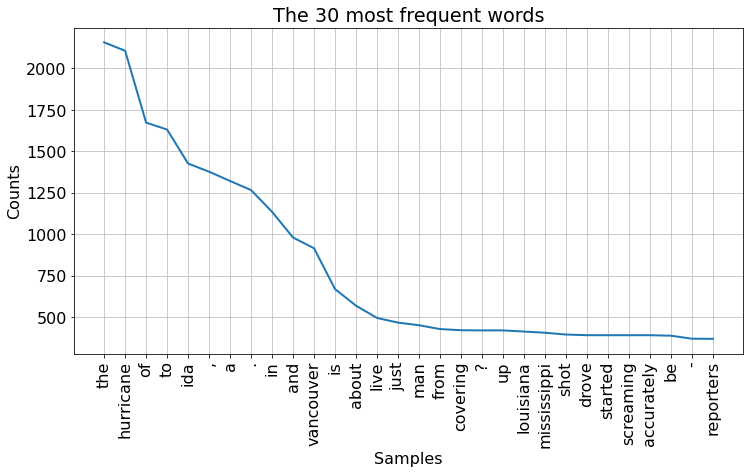

In [62]:
present_freqDist(df["post_title_words"])

Number of words: 113784
Number of unique words: 10709
The five most common words: [('.', 4778), ('the', 4499), (',', 3291), ('to', 2817), ('and', 2290)]


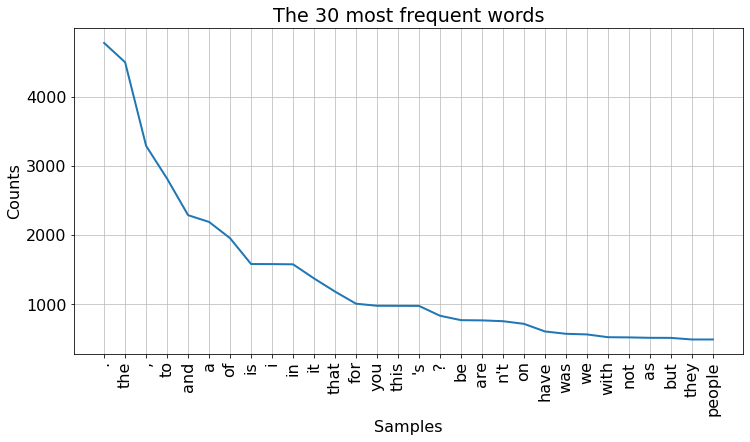

In [63]:
present_freqDist(df["post_text_words"])

### Removing stopwords and punctuation

In [64]:
from nltk.corpus import stopwords
nltk.download('stopwords') # first-time use only
stop_words = stopwords.words('english')  # list of stop words from nltk library

[nltk_data] Downloading package stopwords to /Users/lior/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
def clean_text(text):
    # remove stop words and punctuation
    filtered_text = []
    for word in text:
        # word.isalnum - check if words are not panctuations marks (i.e., alphabets or numbers)
        if word not in stop_words and word.isalnum():
            filtered_text.append(word)
    return filtered_text


df["post_title_words_clean"] = df["post_title_words"].apply(clean_text)
df["post_text_words_clean"] = df["post_text_words"].apply(clean_text)

print('Post title Before removal\n' + str(df["post_title"][0]))
print('\nPost title After removal\n' + str(df["post_title_words_clean"][0]))

print('Post text Before removal\n' + str(df["post_text"][0]))
print('\nPost text After removal\n' + str(df["post_text_words_clean"][0]))

Post title Before removal
Hello, my cousins were some of the people impacted by hurricane ida in nyc and created a gofundme. If anyone can help we would really appreciate it Thank you

Post title After removal
['hello', 'cousins', 'people', 'impacted', 'hurricane', 'ida', 'nyc', 'created', 'gofundme', 'anyone', 'help', 'would', 'really', 'appreciate', 'thank']
Post text Before removal


Post text After removal
[]


Number of words: 33534
Number of unique words: 1334
The five most common words: [('hurricane', 2106), ('ida', 1426), ('vancouver', 915), ('live', 495), ('man', 451)]


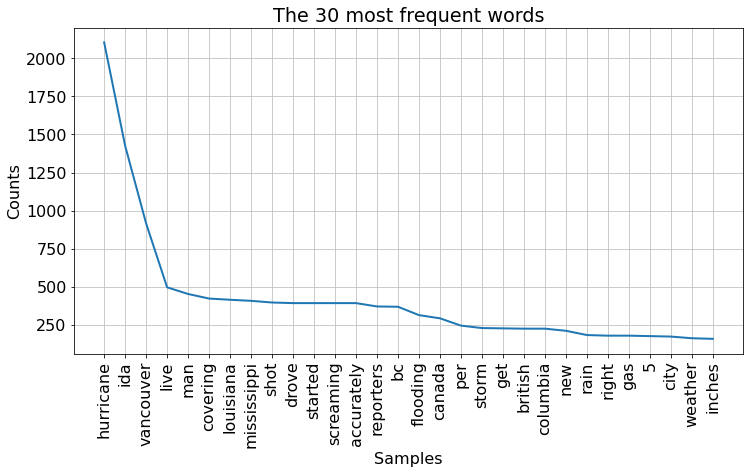

In [66]:
present_freqDist(df["post_title_words_clean"])

Number of words: 51405
Number of unique words: 9046
The five most common words: [('people', 494), ('like', 405), ('get', 343), ('hurricane', 265), ('would', 264)]


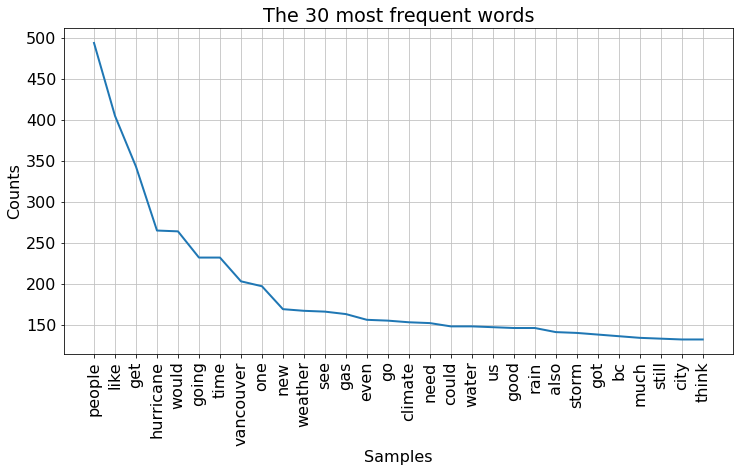

In [67]:
present_freqDist(df["post_text_words_clean"])

### Stemming

In [68]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()


def stem_text(text):
    # stem words in text
    stemmed_words = []
    for word in text:
        stemmed_words.append(stemmer.stem(word))
    return stemmed_words


df["post_title_words_stem"] = df["post_title_words_clean"].apply(stem_text)
df["post_text_words_stem"] = df["post_text_words_clean"].apply(stem_text)

print('Before stemming\n' + str(df["post_title"][0]))
print('\nAfter stemming\n' + str(df["post_title_words_stem"][0]))

print('Before stemming\n' + str(df["post_text"][0]))
print('\nAfter stemming\n' + str(df["post_text_words_stem"][0]))

Before stemming
Hello, my cousins were some of the people impacted by hurricane ida in nyc and created a gofundme. If anyone can help we would really appreciate it Thank you

After stemming
['hello', 'cousin', 'peopl', 'impact', 'hurrican', 'ida', 'nyc', 'creat', 'gofundm', 'anyon', 'help', 'would', 'realli', 'appreci', 'thank']
Before stemming


After stemming
[]


Number of words: 33534
Number of unique words: 1144
The five most common words: [('hurrican', 2120), ('ida', 1426), ('vancouv', 915), ('live', 495), ('flood', 492)]


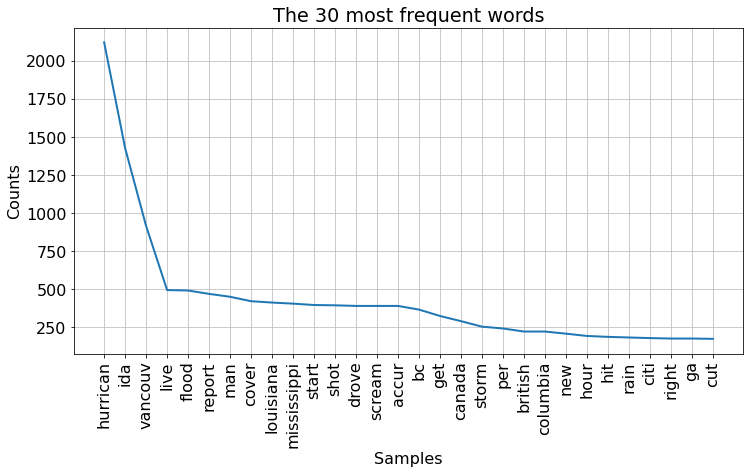

In [69]:
present_freqDist(df["post_title_words_stem"])

Number of words: 51405
Number of unique words: 6454
The five most common words: [('peopl', 498), ('get', 462), ('like', 440), ('go', 387), ('hurrican', 320)]


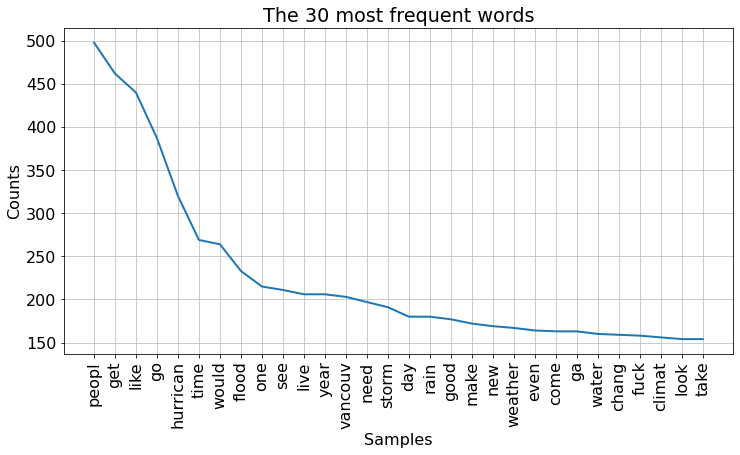

In [70]:
present_freqDist(df["post_text_words_stem"])

### Part of Speech tagging

In [71]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger') # first-time use only

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/lior/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [72]:
pos_tag(df["post_title_words"][0])

[('hello', 'NN'),
 (',', ','),
 ('my', 'PRP$'),
 ('cousins', 'NNS'),
 ('were', 'VBD'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('people', 'NNS'),
 ('impacted', 'VBN'),
 ('by', 'IN'),
 ('hurricane', 'NN'),
 ('ida', 'NN'),
 ('in', 'IN'),
 ('nyc', 'NN'),
 ('and', 'CC'),
 ('created', 'VBD'),
 ('a', 'DT'),
 ('gofundme', 'NN'),
 ('.', '.'),
 ('if', 'IN'),
 ('anyone', 'NN'),
 ('can', 'MD'),
 ('help', 'VB'),
 ('we', 'PRP'),
 ('would', 'MD'),
 ('really', 'RB'),
 ('appreciate', 'VB'),
 ('it', 'PRP'),
 ('thank', 'VB'),
 ('you', 'PRP')]

In [73]:
pos_tag(df["post_text_words"][0])

[]

### Feature extraction

#### Bag of Words and Bag of N-Grams

In [74]:
# tokenize, stem, and remove stopwords
def tokenize_clean_and_stem(text):
    tokens = nltk.word_tokenize(text.lower())
    stems = []
    for token in tokens:
        if token not in stop_words and token.isalnum():
            stems.append(PorterStemmer().stem(token))
    return stems

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

# We create our vectorizer and pass in the posts to build our bag of words matrix.
vectorizer = CountVectorizer(
    tokenizer=tokenize_clean_and_stem, ngram_range=(1, 2), min_df=10)
# ngram_range - min and max number of n-grams.
# min_df - ignore terms that have a document frequency lower than the given threshold. If float in range of [0.0, 1.0], the parameter represents a proportion of documents.

words_title_matrix = vectorizer.fit_transform(df["post_title"].tolist())
words_text_matrix = vectorizer.fit_transform(df["post_text"].tolist())

In [76]:
print(words_title_matrix)
print(words_text_matrix)

  (0, 810)	1
  (0, 548)	1
  (0, 502)	1
  (0, 519)	1
  (0, 765)	1
  (0, 99)	1
  (0, 470)	1
  (0, 1159)	1
  (0, 1032)	1
  (0, 507)	1
  (0, 537)	1
  (1, 548)	1
  (1, 502)	1
  (1, 519)	1
  (1, 507)	1
  (2, 548)	1
  (2, 519)	1
  (2, 470)	1
  (2, 93)	1
  (3, 502)	1
  (3, 519)	1
  (3, 470)	1
  (3, 507)	1
  (3, 744)	1
  (3, 912)	2
  :	:
  (3568, 937)	1
  (3568, 80)	1
  (3568, 1054)	1
  (3568, 1129)	1
  (3568, 945)	1
  (3568, 1087)	1
  (3568, 121)	1
  (3568, 1090)	1
  (3568, 1051)	1
  (3568, 742)	1
  (3568, 131)	1
  (3569, 103)	1
  (3569, 357)	1
  (3569, 1120)	1
  (3569, 937)	1
  (3569, 80)	1
  (3569, 1054)	1
  (3569, 1129)	1
  (3569, 945)	1
  (3569, 1087)	1
  (3569, 121)	1
  (3569, 1090)	1
  (3569, 1051)	1
  (3569, 742)	1
  (3569, 131)	1
  (4, 452)	1
  (4, 1038)	1
  (4, 431)	1
  (4, 957)	1
  (5, 431)	1
  (5, 206)	1
  (5, 853)	1
  (5, 165)	1
  (5, 881)	1
  (7, 456)	1
  (7, 460)	1
  (7, 1047)	1
  (7, 504)	1
  (7, 566)	1
  (7, 1030)	1
  (7, 446)	1
  (7, 387)	1
  (7, 457)	1
  (8, 1030)	1
  (8, 632

In [77]:
words_title_matrix.toarray()
words_text_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [78]:
print(vectorizer.get_feature_names())

['1', '10', '100', '150', '2', '20', '200', '2021', '3', '30', '30l', '4', '5', '50', '6', '7', '99', 'abbotsford', 'abl', 'absolut', 'access', 'accid', 'accord', 'account', 'accur', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'add', 'addit', 'address', 'advic', 'affect', 'afford', 'aftermath', 'age', 'ago', 'air', 'alberta', 'alert', 'allow', 'almost', 'alon', 'along', 'alreadi', 'also', 'altern', 'altern link', 'alway', 'amaz', 'america', 'american', 'among', 'amount', 'anim', 'announc', 'anoth', 'answer', 'anymor', 'anyon', 'anyth', 'anyway', 'anywher', 'apart', 'app', 'appli', 'appreci', 'approach', 'area', 'around', 'arriv', 'articl', 'asap', 'ask', 'ass', 'asshol', 'assist', 'assum', 'atmospher', 'attack', 'attent', 'automat', 'avail', 'avail mirror', 'avoid', 'away', 'awesom', 'back', 'bad', 'bare', 'base', 'basement', 'basic', 'bc', 'beach', 'beauti', 'becom', 'begin', 'behind', 'believ', 'best', 'bet', 'better', 'biden', 'big', 'billion', 'bit', 'black', 'blame', 'bloc

### Term Frequency-Inverse Document Frequency (TF-IDF)

#### Creating the feature matrix

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=tokenize_clean_and_stem,
                        ngram_range=(1, 2), min_df=50)
tfidf_title_matrix = tfidf.fit_transform(df["post_title"].tolist())
tfidf_text_matrix = tfidf.fit_transform(df["post_text"].tolist())

In [80]:
print(tfidf_title_matrix)
print(tfidf_text_matrix)

  (0, 96)	0.24090387323268894
  (0, 84)	0.5767671161886873
  (0, 152)	0.48231757285380855
  (0, 100)	0.2176518038519124
  (0, 94)	0.1903900604053379
  (0, 160)	0.5413447087024547
  (1, 96)	0.6400697137640793
  (1, 100)	0.5782901118288263
  (1, 94)	0.5058570035918977
  (2, 17)	0.6489799056220509
  (2, 84)	0.7118094150502476
  (2, 100)	0.268612059938898
  (3, 49)	0.4006420620622917
  (3, 148)	0.48992201635853344
  (3, 96)	0.27082640603103386
  (3, 84)	0.6484070309794843
  (3, 100)	0.24468621036428578
  (3, 94)	0.21403830130121965
  (4, 49)	0.4006420620622917
  (4, 148)	0.48992201635853344
  (4, 96)	0.27082640603103386
  (4, 84)	0.6484070309794843
  (4, 100)	0.24468621036428578
  (4, 94)	0.21403830130121965
  (5, 49)	0.4006420620622917
  :	:
  (3565, 18)	0.5098128629067451
  (3566, 220)	0.44084126413731023
  (3566, 19)	0.3268462184559528
  (3566, 219)	0.232345115489015
  (3566, 213)	0.4347291163637862
  (3566, 227)	0.44265982065650356
  (3566, 18)	0.5098128629067451
  (3567, 220)	0.440841

In [83]:
dense_title = tfidf_title_matrix.toarray()
dense_text = tfidf_text_matrix.toarray()
tfidf_features = tfidf.get_feature_names()
# features_title = pd.DataFrame(data=dense_title, columns=tfidf_features)
features_text = pd.DataFrame(data=dense_text, columns=tfidf_features)

### Cosine similarity
We will use cosine similarity to test for the similarity between two posts. The cosine similarity is the cosine of the angle between two vectors. Its value range from -1 to 1, with 1 as the highest similarity

In [84]:
from sklearn.metrics.pairwise import cosine_similarity

# similarities between all texts
similrities_title_matrix = cosine_similarity(tfidf_title_matrix, tfidf_title_matrix)
similrities_text_matrix = cosine_similarity(tfidf_text_matrix, tfidf_text_matrix)

print(similrities_title_matrix)
print(similrities_text_matrix)

[[1.         0.3763713  0.46901216 ... 0.         0.         0.        ]
 [0.3763713  1.         0.1553357  ... 0.         0.         0.        ]
 [0.46901216 0.1553357  1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         1.         1.        ]
 [0.         0.         0.         ... 1.         1.         1.        ]
 [0.         0.         0.         ... 1.         1.         1.        ]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [85]:
similrities_title_matrix[0,1]

0.3763713046442981

In [86]:
similrities_text_matrix[0,1]

0.0

## <font color=orange>Sentiment Analysis</font>

In [87]:
import nltk
nltk.download('vader_lexicon') # first-time use only, download VADER lexicon.

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lior/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Use VADER to analyze our Reddit data

In [88]:
print('Post title\n' + str(df["post_title"][0]))
print('\nSentiment scores\n' + str(analyzer.polarity_scores(df["post_title"][0])))

print('Post text\n' + str(df["post_text"][0]))
print('\nSentiment scores\n' + str(analyzer.polarity_scores(df["post_text"][0])))

Post title
Hello, my cousins were some of the people impacted by hurricane ida in nyc and created a gofundme. If anyone can help we would really appreciate it Thank you

Sentiment scores
{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'compound': 0.8576}
Post text


Sentiment scores
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}


In [89]:
from nltk import tokenize

sentence_title_list = tokenize.sent_tokenize(df["post_title"][0])
paragraphSentiments = 0.0

for sentence in sentence_title_list:
    sentiment_scores = analyzer.polarity_scores(sentence)
    print("{:-<80} {}".format(sentence, str(sentiment_scores["compound"])))
    paragraphSentiments += sentiment_scores["compound"]
print("AVERAGE SENTIMENT FOR PARAGRAPH: \t" +
      str(round(paragraphSentiments / len(sentence_title_list), 4)))

Hello, my cousins were some of the people impacted by hurricane ida in nyc and created a gofundme. 0.25
If anyone can help we would really appreciate it Thank you---------------------- 0.8155
AVERAGE SENTIMENT FOR PARAGRAPH: 	0.5328


In [90]:
sentence_text_list = tokenize.sent_tokenize(df["post_text"][0])
paragraphSentiments = 0.0

for sentence in sentence_text_list:
    sentiment_scores = analyzer.polarity_scores(sentence)
    print("{:-<80} {}".format(sentence, str(sentiment_scores["compound"])))
    paragraphSentiments += sentiment_scores["compound"]
print("AVERAGE SENTIMENT FOR PARAGRAPH: \t" +
      str(round(paragraphSentiments / len(sentence_text_list), 4)))

ZeroDivisionError: float division by zero

### Get the Sentiment Score of all posts

We will now compute the sentiment for the entire dataset. We will add 4 new sentiment columns (neg, neu, pos and compound) using the `apply` method.

In [91]:
df['neg'] = df['post_title'].apply(lambda x: analyzer.polarity_scores(x)['neg'])
df['neu'] = df['post_title'].apply(lambda x: analyzer.polarity_scores(x)['neu'])
df['pos'] = df['post_title'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
df['compound'] = df['post_title'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [92]:
df['neg'] = df['post_text'].apply(
lambda x: analyzer.polarity_scores(x)['neg'])
df['neu'] = df['post_text'].apply(
    lambda x: analyzer.polarity_scores(x)['neu'])
df['pos'] = df['post_text'].apply(
    lambda x: analyzer.polarity_scores(x)['pos'])
df['compound'] = df['post_text'].apply(
    lambda x: analyzer.polarity_scores(x)['compound'])

In [93]:
df.head()

,index,post_index,is_post,subreddit,author,post_title,post_text,num_comments,score,upvote_ratio,...,post_title_words,post_text_words,post_title_words_clean,post_text_words_clean,post_title_words_stem,post_text_words_stem,neg,neu,pos,compound
0,1,2,yes,hurricaneida,EmCBx807,"Hello, my cousins were some of the people impa...",,0,1,1.00,...,"[hello, ,, my, cousins, were, some, of, the, p...",[],"[hello, cousins, people, impacted, hurricane, ...",[],"[hello, cousin, peopl, impact, hurrican, ida, ...",[],0.0,0.00,0.00,0.0000
1,2,3,yes,hurricaneida,LydiaClivens,Impacted by hurricane Ida,,1,1,1.00,...,"[impacted, by, hurricane, ida]",[],"[impacted, hurricane, ida]",[],"[impact, hurrican, ida]",[],0.0,0.00,0.00,0.0000
2,3,5,yes,hurricaneida,Ok_Energy_2968,"Hi all, anything you can do to help this is an...",,0,4,1.00,...,"[hi, all, ,, anything, you, can, do, to, help,...",[],"[hi, anything, help, another, family, impacted...",[],"[hi, anyth, help, anoth, famili, impact, ida, ...",[],0.0,0.00,0.00,0.0000
3,4,6,yes,hurricaneida,petermakesart,Fuck Hurricane Ida Shirts (and others)- fundra...,,6,4,0.83,...,"[fuck, hurricane, ida, shirts, (, and, others,...",[],"[fuck, hurricane, ida, shirts, others, fundrai...",[],"[fuck, hurrican, ida, shirt, other, fundrais, ...",[],0.0,0.00,0.00,0.0000
4,5,6,no,hurricaneida,petermakesart,Fuck Hurricane Ida Shirts (and others)- fundra...,http://ei8ht.store if you want to help out. Th...,0,2,0.00,...,"[fuck, hurricane, ida, shirts, (, and, others,...","[http, :, //ei8ht.store, if, you, want, to, he...","[fuck, hurricane, ida, shirts, others, fundrai...","[http, want, help, thank]","[fuck, hurrican, ida, shirt, other, fundrais, ...","[http, want, help, thank]",0.0,0.48,0.52,0.6705


In [94]:
df[['neg', 'neu', 'pos', 'compound']].describe()

,neg,neu,pos,compound
count,3570.000000,3570.000000,3570.000000,3570.000000
mean,0.092388,0.723120,0.099333,0.001057
std,0.145604,0.288513,0.150336,0.454583
min,0.000000,0.000000,0.000000,-0.996600
25%,0.000000,0.633000,0.000000,-0.296000
50%,0.000000,0.795500,0.000000,0.000000
75%,0.143000,0.940000,0.153000,0.340900
max,1.000000,1.000000,1.000000,0.995300


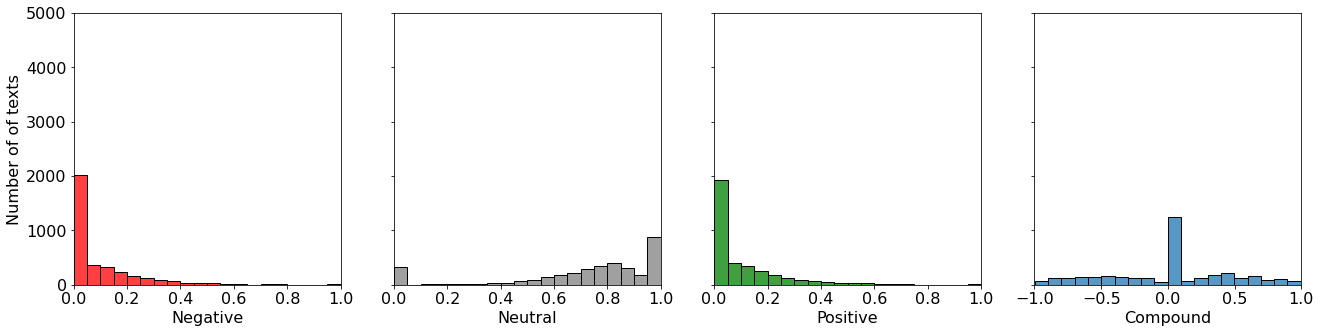

In [97]:

fig, axs = plt.subplots(1, 4, figsize=(22, 5), sharey=True)

plt.ylim(0,140)
axs[0].set_ylabel('Number of of texts')

sns.histplot(data=df, x="neg", color='r', bins=20, ax=axs[0])
sns.histplot(data=df, x="neu", color='grey', bins=20, ax=axs[1])
sns.histplot(data=df, x="pos", color='g', bins=20, ax=axs[2])
sns.histplot(data=df, x="compound", bins=20, ax=axs[3])

axs[0].set(xlim=(0,1), ylim=(0,5000), xlabel='Negative')
axs[1].set(xlim=(0,1), ylim=(0,5000), xlabel='Neutral')
axs[2].set(xlim=(0,1), ylim=(0,5000), xlabel='Positive')
axs[3].set(xlim=(-1,1), ylim=(0,5000), xlabel='Compound');

Posts sentiment mean: 0.02
Comments sentiment mean: -0.00


Text(0.5, 13.27999999999998, '')

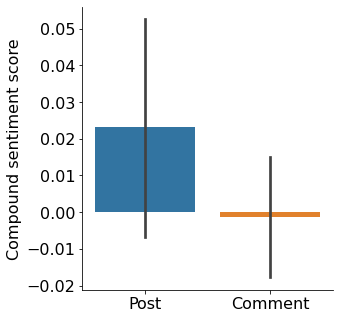

In [98]:
posts_df = df[df["is_post"] == 'yes']
comment_df = df[df["is_post"] == 'no']

print("Posts sentiment mean: {:.2f}".format(posts_df.compound.mean()))
print("Comments sentiment mean: {:.2f}".format(comment_df.compound.mean()))

# plotting the results
# to use catplot, we first need to reshape the data from wide to long
sns.catplot(x="is_post", y="compound", kind="bar", data=df)

plt.ylabel('Compound sentiment score')
plt.gca().set_xticklabels(['Post', 'Comment'])
plt.xlabel(None)